Connect with google drive, and copy the sample data.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# !cp -r drive/MyDrive/data/project_jl/. .

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# !cp -r drive/MyDrive/data/project_jl/. .

Install and update libraries.

In [1]:
import pandas as pd
import numpy as np
import warnings, csv
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [3]:
# symbols = ["BTCUSDT","SOLUSDT","PNUTUSDT","TURBOUSDT","APTUSDT","AIXBTUSDT","TAOUSDT","KAITOUSDT","OMUSDT","XRPUSDT","FETUSDT","UNIUSDT","COMPUSDT","THEUSDT","AVAXUSDT","LTCUSDT","ETCUSDT","FORMUSDT","TONUSDT","HFTUSDT","DOTUSDT","CHESSUSDT","MKRUSDT","WIFUSDT"]
# selected_symbols = ["BTCUSDT","SOLUSDT","PNUTUSDT","TURBOUSDT","APTUSDT","AIXBTUSDT","TAOUSDT","KAITOUSDT","OMUSDT"]
# selected_symbols = ["BTCUSDT","FETUSDT","AVAXUSDT", "ETCUSDT","HFTUSDT","WIFUSDT"]

symbols = ["AVAXUSDT","CHESSUSDT","TONUSDT"]
selected_symbols = symbols.copy()

# basis_name, label = 'basis_5_2025-05-22.csv', 'at 05-22'
# basis_name, label = 'basis_quotes_2025-06-07.csv', 'at 06-07 (bad time)'
# basis_name, label = 'basis_quotes_2025-04-05.csv', 'at 04-05 (good times)'
basis_name, label = 'basis_book_snapshot_5_3weeks.csv', '3 weeks'
df_basis = pd.read_csv(basis_name)

# Convert 'local_timestamp' to datetime and set as index
df_basis['local_timestamp'] = pd.to_datetime(df_basis['local_timestamp'])
df_basis = df_basis.set_index('local_timestamp')

display(df_basis.info())
# print(df_basis.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1721689 entries, 2025-09-01 00:00:00 to 2025-09-20 23:58:46
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   AVAXUSDT.basis1   float64
 1   AVAXUSDT.basis2   float64
 2   CHESSUSDT.basis1  float64
 3   CHESSUSDT.basis2  float64
 4   TONUSDT.basis1    float64
 5   TONUSDT.basis2    float64
dtypes: float64(6)
memory usage: 91.9 MB


None

Coin:  AVAXUSDT
Coin:  CHESSUSDT
Coin:  TONUSDT


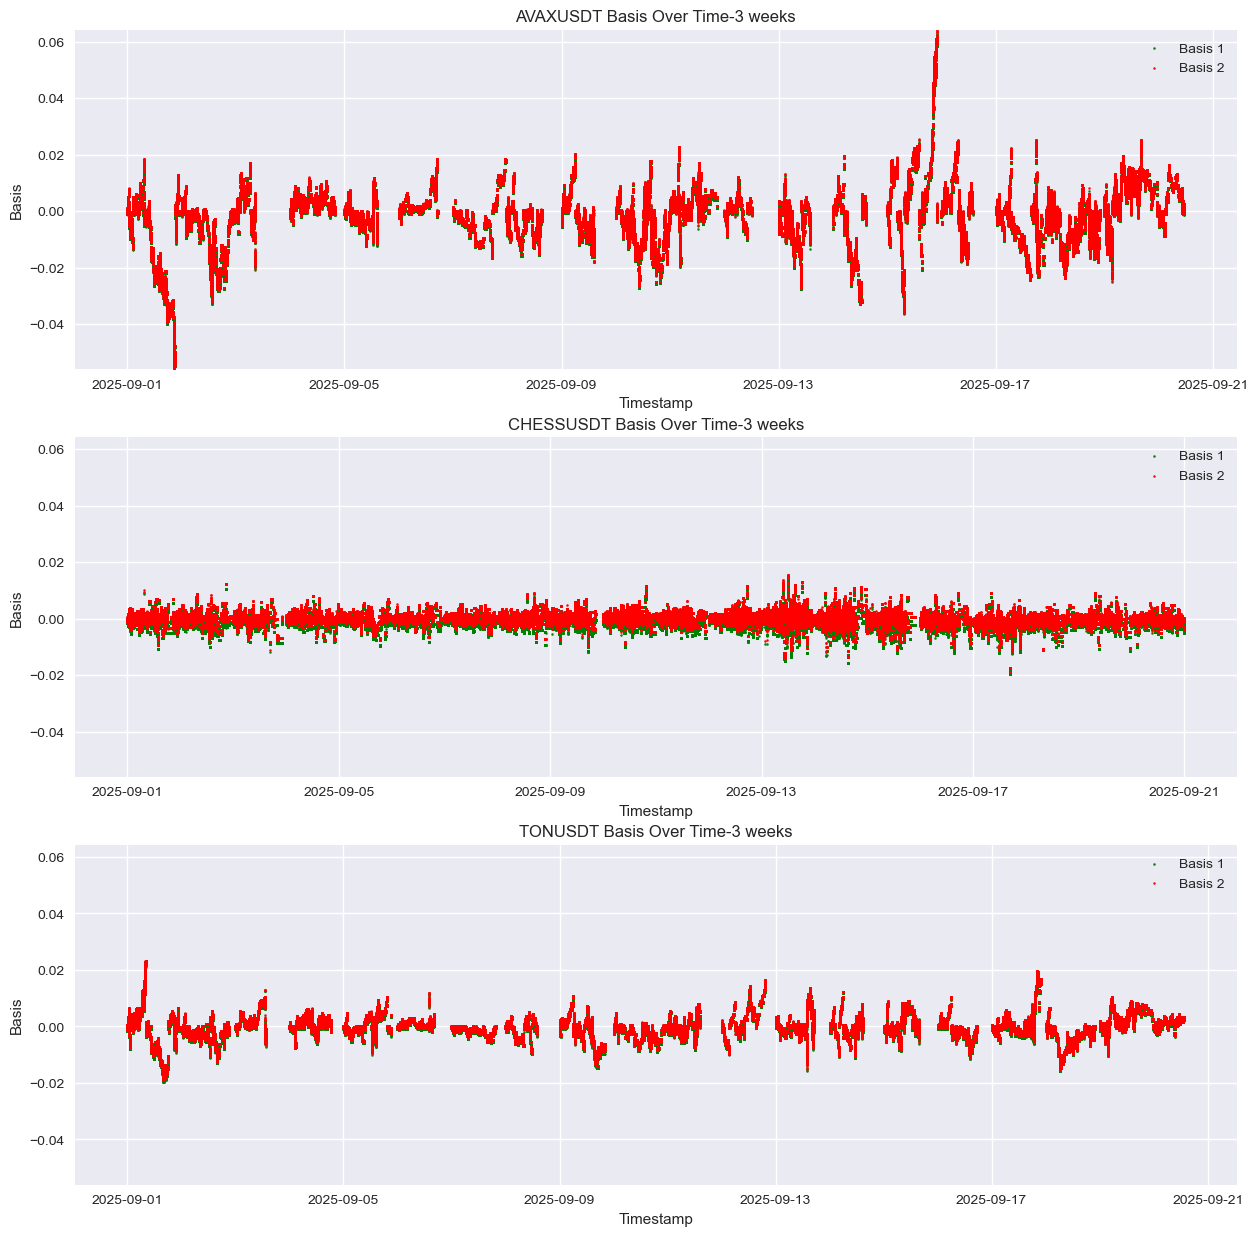

In [4]:
num_symbols = len(selected_symbols)
num_cols = 1  # Adjust the number of columns as needed
num_rows = num_symbols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten() # Flatten the array of axes for easy iteration

# Find global min and max for all basis data
all_basis_values = []
for symbol in selected_symbols:
    basis1_col = f'{symbol}.basis1'
    basis2_col = f'{symbol}.basis2'
    if basis1_col in df_basis.columns:
        all_basis_values.extend(df_basis[basis1_col].dropna().tolist())
    if basis2_col in df_basis.columns:
        all_basis_values.extend(df_basis[basis2_col].dropna().tolist())

global_min_basis = min(all_basis_values) if all_basis_values else 0
global_max_basis = max(all_basis_values) if all_basis_values else 1


for i, symbol in enumerate(selected_symbols):
    print('Coin: ', symbol)
    ax = axes[i]
    basis1_col = f'{symbol}.basis1'
    basis2_col = f'{symbol}.basis2'

    # if basis1_col in df_basis.columns:
    #     ax.plot(df_basis.index, df_basis[basis1_col], label='Basis 1', color = 'b', linewidth = 1.5)
    # if basis2_col in df_basis.columns:
    #     ax.plot(df_basis.index, df_basis[basis2_col], label='Basis 2')

    if basis1_col in df_basis.columns:
        ax.scatter(df_basis.index, df_basis[basis1_col], label='Basis 1', color = 'g', s = 2)
    if basis2_col in df_basis.columns:
        ax.scatter(df_basis.index, df_basis[basis2_col], label='Basis 2', color = 'r', s = 2)

    ax.set_title(f'{symbol} Basis Over Time-' + label)
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Basis')
    ax.legend()
    ax.grid(True)
    # ax.tick_params(axis='x', rotation=45) # Rotate x-axis labels for better readability
    ax.set_ylim(global_min_basis, global_max_basis) # Set consistent y-axis limits

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# plt.tight_layout()
plt.show()

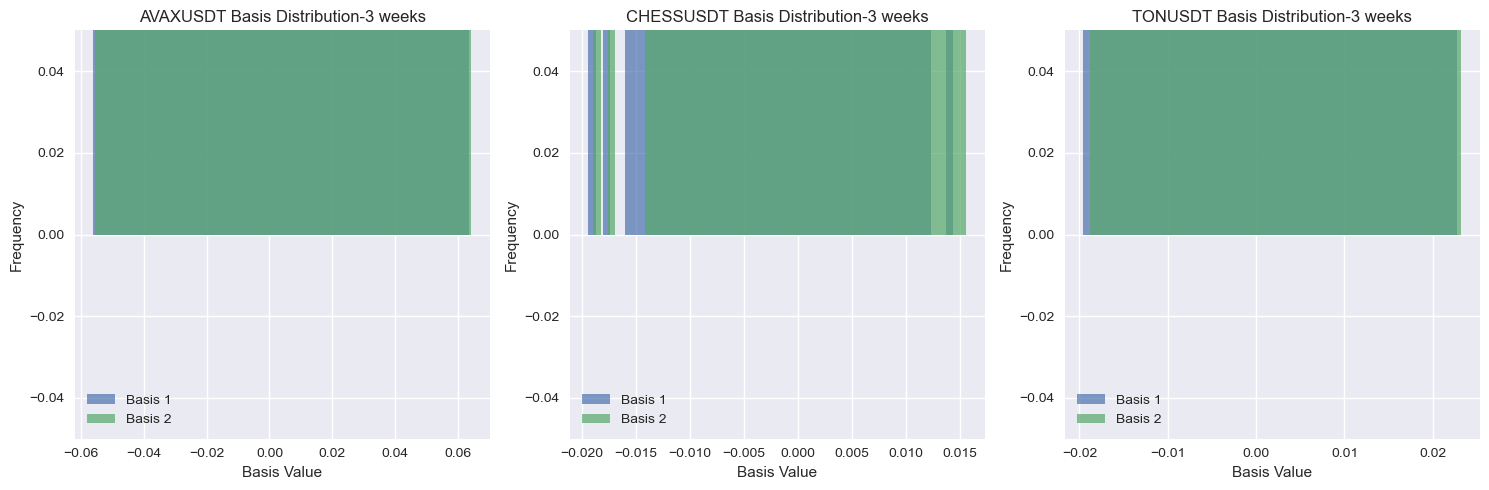

In [5]:
num_symbols = len(selected_symbols)
num_cols = 3  # Adjust the number of columns as needed
num_rows = (num_symbols + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten() # Flatten the array of axes for easy iteration

# Find the global maximum frequency across all histograms
max_frequency = 0
for symbol in selected_symbols:
    df_symbol = globals().get(f'df_drop_duration_{symbol}')

    if df_symbol is not None and not df_symbol.empty:
        # Get histogram data without plotting
        basis1_col = f'{symbol}.basis1'
        basis2_col = f'{symbol}.basis2'
        if basis1_col in df_basis.columns:
            counts1, bins1 = np.histogram(df_basis[basis1_col].dropna(), bins=50)
            max_frequency = max(max_frequency, counts1.max() if counts1.size > 0 else 0)
        if basis2_col in df_basis.columns:
            counts2, bins2 = np.histogram(df_basis[basis2_col].dropna(), bins=50)
            max_frequency = max(max_frequency, counts2.max() if counts2.size > 0 else 0)


for i, symbol in enumerate(selected_symbols):
    ax = axes[i]
    basis1_col = f'{symbol}.basis1'
    basis2_col = f'{symbol}.basis2'

    if basis1_col in df_basis.columns:
        ax.hist(df_basis[basis1_col].dropna(), bins=50, alpha=0.7, label='Basis 1')
    if basis2_col in df_basis.columns:
        ax.hist(df_basis[basis2_col].dropna(), bins=50, alpha=0.7, label='Basis 2')

    ax.set_title(f'{symbol} Basis Distribution-' + label)
    ax.set_xlabel('Basis Value')
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True)
    ax.set_ylim(0, max_frequency * 1.1) # Set consistent y-axis limits with a small buffer


# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [6]:
display(df_basis.describe())

,AVAXUSDT.basis1,AVAXUSDT.basis2,CHESSUSDT.basis1,CHESSUSDT.basis2,TONUSDT.basis1,TONUSDT.basis2
count,1.301144e+06,1.301124e+06,1.670689e+06,1.670685e+06,1.339720e+06,1.339700e+06
mean,-2.200393e-03,-1.707291e-03,-1.336594e-03,1.505060e-05,-6.437194e-04,-1.694025e-04
std,1.039827e-02,1.041161e-02,2.203240e-03,2.198834e-03,4.446083e-03,4.412752e-03
min,-5.604204e-02,-5.545708e-02,-1.942090e-02,-1.898745e-02,-1.955606e-02,-1.885731e-02
25%,-7.264719e-03,-6.778586e-03,-2.170964e-03,-8.270159e-04,-2.845680e-03,-2.340810e-03
50%,-8.624408e-04,-4.090816e-04,-1.108187e-03,1.389757e-04,-6.445376e-04,-1.967407e-04
75%,3.347925e-03,3.897027e-03,-3.708053e-04,9.726951e-04,1.565270e-03,2.003167e-03
max,6.347174e-02,6.420848e-02,1.437625e-02,1.560790e-02,2.279037e-02,2.320853e-02


In [7]:
from scipy.signal import argrelextrema

all_symbols_drop_data = {}

for symbol in selected_symbols:
    print(f"Processing {symbol}...")
    symbol_drop_data = []

    for basis_col in [f'{symbol}.basis1', f'{symbol}.basis2']:
        if basis_col in df_basis.columns:
            series = df_basis[basis_col].dropna()

            if not series.empty:
                # Find local maxima and minima
                local_maxima_indices = argrelextrema(series.values, np.greater)[0]
                local_minima_indices = argrelextrema(series.values, np.less)[0]

                # Ensure indices are from the original series
                local_maxima_times = series.iloc[local_maxima_indices].index
                local_minima_times = series.iloc[local_minima_indices].index

                # Find drops from local maxima to subsequent local minima
                for peak_time in local_maxima_times:
                    # Find the first local minimum after the peak
                    subsequent_minima = local_minima_times[local_minima_times > peak_time]
                    if not subsequent_minima.empty:
                        for trough_time in subsequent_minima:
                            drop_value = series.loc[peak_time] - series.loc[trough_time]
                            duration = (trough_time - peak_time).total_seconds()
                            if drop_value > 0:
                                symbol_drop_data.append({'Symbol': symbol, 'Basis': basis_col, 'Drop': drop_value, 'Duration': duration})
                                break
                        # trough_time = subsequent_minima[0]
                        # drop_value = series.loc[peak_time] - series.loc[trough_time]
                        # duration = (trough_time - peak_time).total_seconds()

                        # symbol_drop_data.append({'Symbol': symbol, 'Basis': basis_col, 'Drop': drop_value, 'Duration': duration})

    df_symbol_drops = pd.DataFrame(symbol_drop_data)
    all_symbols_drop_data[symbol] = df_symbol_drops # Store dataframe in dictionary

# Store dataframes in separate variables as requested
for symbol, df in all_symbols_drop_data.items():
    globals()[f'df_drop_duration_{symbol}'] = df

print("Processing complete. Dataframes for each symbol stored separately.")

Processing AVAXUSDT...
Processing CHESSUSDT...
Processing TONUSDT...
Processing complete. Dataframes for each symbol stored separately.


## Histograms of Drop and Duration

Generate histograms to visualize the distribution of drop and duration for each selected symbol.

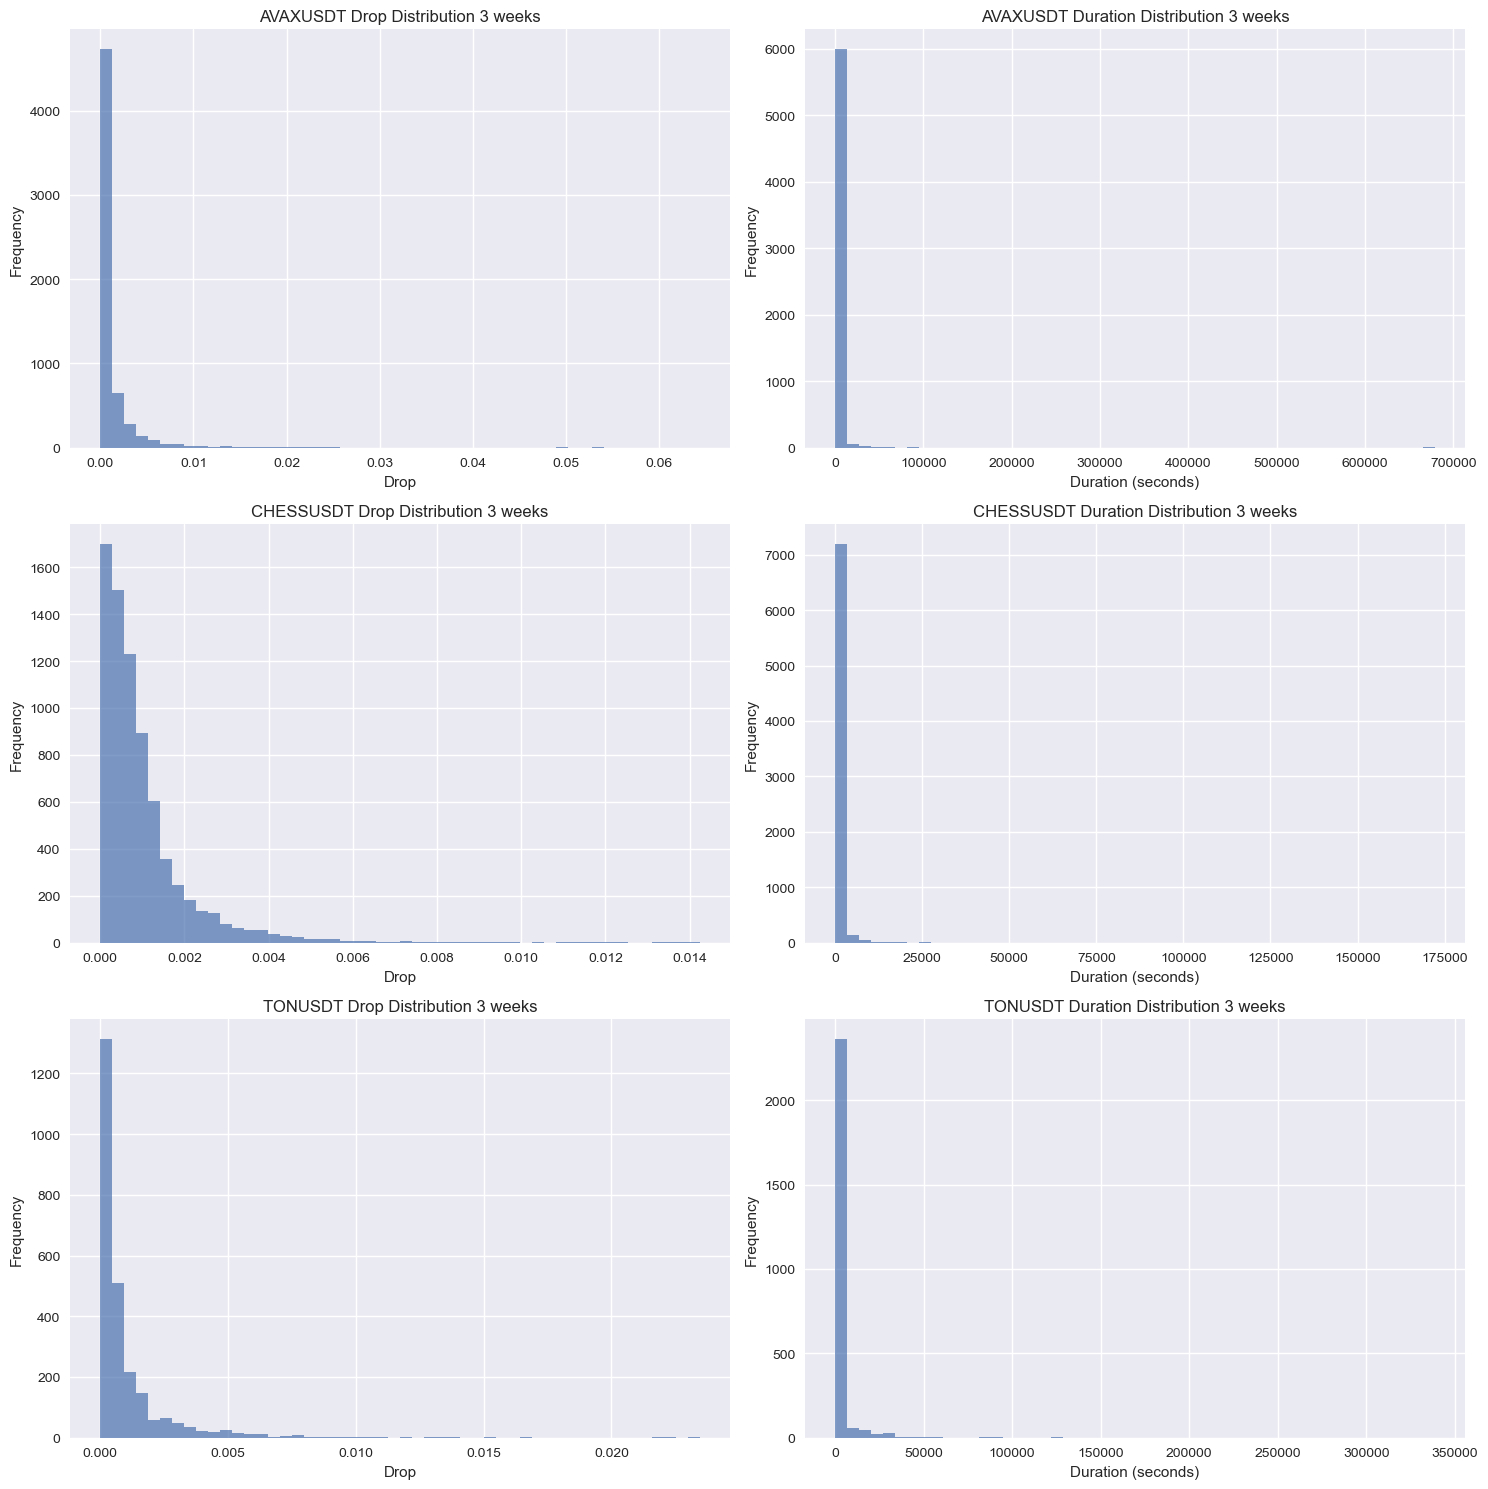

In [8]:
num_symbols = len(selected_symbols)
num_cols = 2 # One column for Drop histogram, one for Duration histogram
num_rows = num_symbols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, symbol in enumerate(selected_symbols):
    df_symbol = globals().get(f'df_drop_duration_{symbol}')

    if df_symbol is not None and not df_symbol.empty:
        # Histogram for Drop
        ax_drop = axes[i * num_cols]
        ax_drop.hist(df_symbol['Drop'].dropna(), bins=50, alpha=0.7)
        ax_drop.set_title(f'{symbol} Drop Distribution '+label)
        ax_drop.set_xlabel('Drop')
        ax_drop.set_ylabel('Frequency')
        ax_drop.grid(True)

        # Histogram for Duration
        ax_duration = axes[i * num_cols + 1]
        ax_duration.hist(df_symbol['Duration'].dropna(), bins=50, alpha=0.7)
        ax_duration.set_title(f'{symbol} Duration Distribution '+label)
        ax_duration.set_xlabel('Duration (seconds)')
        ax_duration.set_ylabel('Frequency')
        ax_duration.grid(True)
    else:
        # Hide axes if no data for the symbol
        axes[i * num_cols].axis('off')
        axes[i * num_cols + 1].axis('off')


plt.tight_layout()
plt.show()

## Summary Statistics for All Drops

Combine the drop information for all selected symbols and display summary statistics.

In [9]:
all_drops_data = []
for symbol in selected_symbols:
    df_symbol = globals().get(f'df_drop_duration_{symbol}')
    if df_symbol is not None and not df_symbol.empty:
        all_drops_data.append(df_symbol)

if all_drops_data:
    df_all_drops = pd.concat(all_drops_data, ignore_index=True)
    display(df_all_drops.describe())
else:
    print("No drop data available for the selected symbols.")

,Drop,Duration
count,1.608800e+04,16088.000000
mean,1.153550e-03,1357.730296
std,2.427996e-03,15841.445948
min,1.731302e-08,1.000000
25%,2.584265e-04,1.000000
50%,5.549323e-04,12.000000
75%,1.212811e-03,144.000000
max,6.434037e-02,679056.000000


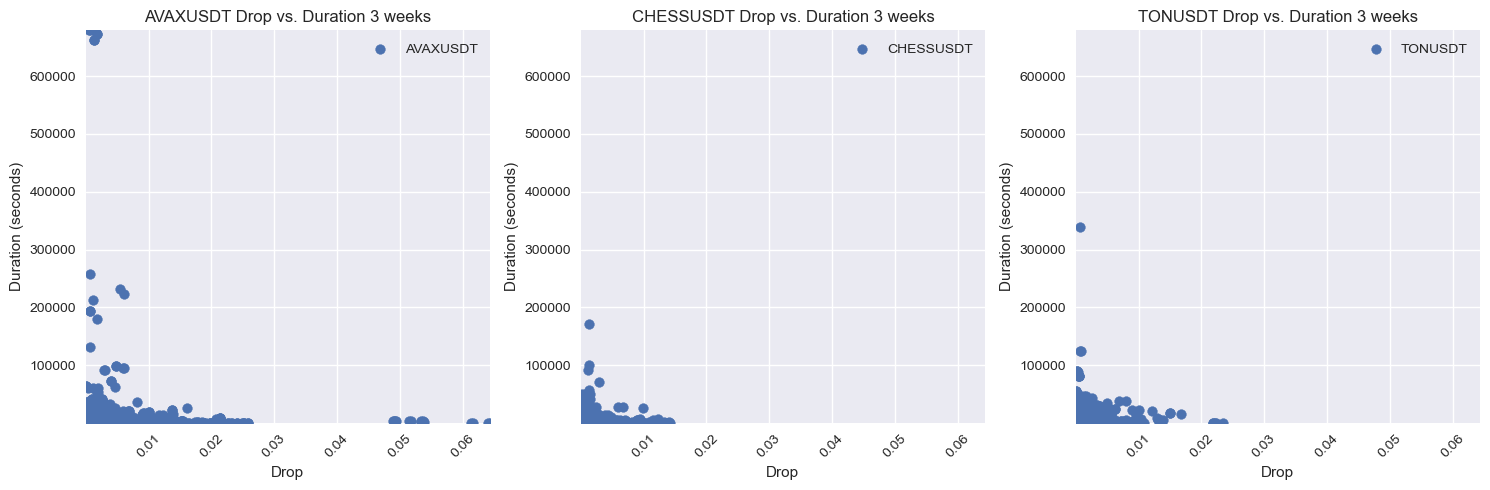

In [10]:
num_symbols = len(selected_symbols)
num_cols = 3  # Adjust the number of columns as needed
num_rows = (num_symbols + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten() # Flatten the array of axes for easy iteration

# Find global min and max for all Drop and Duration data
all_drops_data = []
for symbol in selected_symbols:
    df_symbol = globals().get(f'df_drop_duration_{symbol}')
    if df_symbol is not None and not df_symbol.empty:
        all_drops_data.append(df_symbol)

if all_drops_data:
    df_all_drops = pd.concat(all_drops_data, ignore_index=True)
    global_min_drop = df_all_drops['Drop'].min()
    global_max_drop = df_all_drops['Drop'].max()
    global_min_duration = df_all_drops['Duration'].min()
    global_max_duration = df_all_drops['Duration'].max()
else:
    global_min_drop, global_max_drop, global_min_duration, global_max_duration = 0, 1, 0, 100 # Default limits if no data


for i, symbol in enumerate(selected_symbols):
    ax = axes[i]
    df_symbol = globals().get(f'df_drop_duration_{symbol}') # Get the dataframe for the current symbol

    if df_symbol is not None and not df_symbol.empty:
        ax.scatter(df_symbol['Drop'], df_symbol['Duration'], label=symbol)
        ax.set_title(f'{symbol} Drop vs. Duration '+label)
        ax.set_xlabel('Drop')
        ax.set_ylabel('Duration (seconds)')
        ax.legend()
        ax.grid(True)
        ax.tick_params(axis='x', rotation=45) # Rotate x-axis labels for better readability
        ax.set_xlim(global_min_drop, global_max_drop) # Set consistent x-axis limits
        ax.set_ylim(global_min_duration, global_max_duration) # Set consistent y-axis limits

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

开始基差套利回测...
✓ 基差差异计算完成
✓ 交易信号生成完成
✓ 收益计算完成
✓ 回测指标计算完成

基差套利回测结果
初始资金: 100000
最终资金: -431747.38
总收益率: -531.75%
年化收益率: nan%
年化波动率: 8.9380
夏普比率: nan
最大回撤: -538.90%
总交易次数: 716
交易成本: 0.00


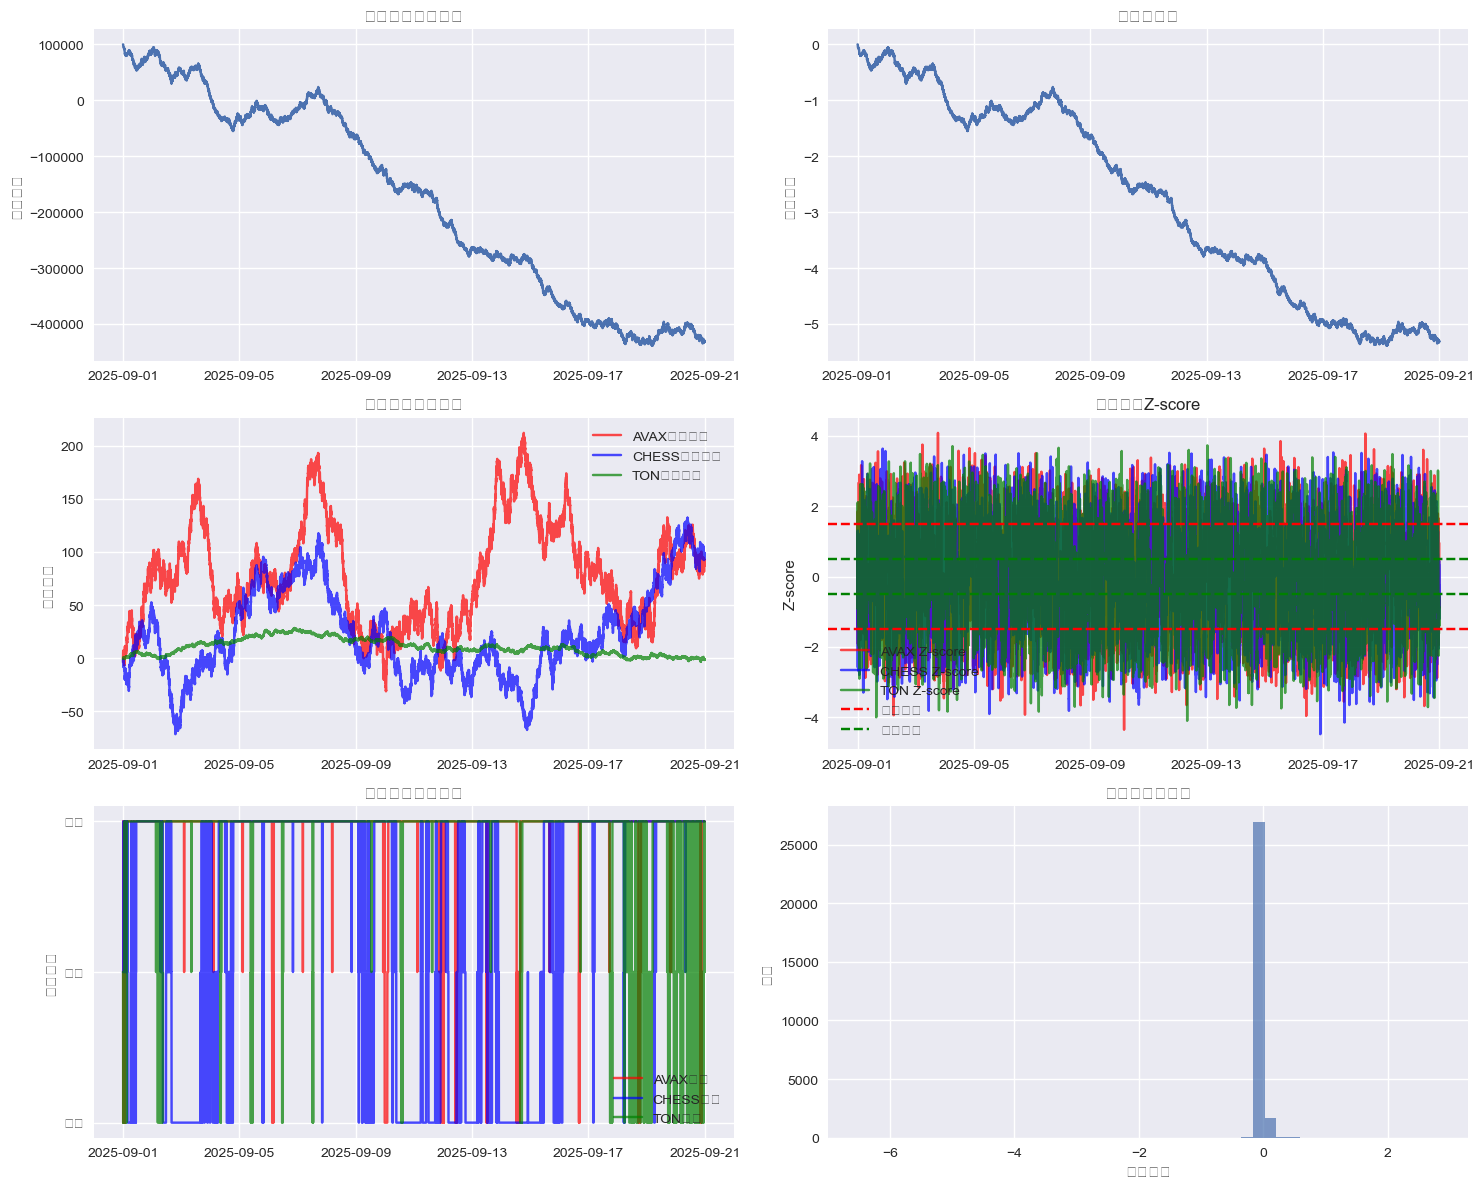

回测结果已保存到 basis_arbitrage_backtest_results.csv


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

class BasisArbitrageBacktest:
    def __init__(self, df, initial_capital=100000, transaction_cost=0.001):
        """
        初始化基差套利回测系统
        
        Parameters:
        -----------
        df : DataFrame
            包含基差数据的DataFrame
        initial_capital : float
            初始资金
        transaction_cost : float
            交易成本（手续费率）
        """
        self.df = df.copy()
        self.initial_capital = initial_capital
        self.transaction_cost = transaction_cost
        self.results = {}
        
    def add_strategy_parameters(self, entry_threshold=0.02, exit_threshold=0.005, 
                              max_holding_period=24, lookback_window=60):
        """
        设置策略参数
        
        Parameters:
        -----------
        entry_threshold : float
            入场阈值，基差差异超过此值时开仓
        exit_threshold : float
            出场阈值，基差回归到此值时平仓
        max_holding_period : int
            最大持仓周期（小时）
        lookback_window : int
            回看窗口，用于计算动态阈值
        """
        self.entry_threshold = entry_threshold
        self.exit_threshold = exit_threshold
        self.max_holding_period = max_holding_period
        self.lookback_window = lookback_window
    
    def calculate_basis_spread(self):
        """
        计算各交易对的基差差异和统计特征
        """
        # 计算基差差异
        self.df['AVAX_spread'] = self.df['AVAXUSDT.basis1'] - self.df['AVAXUSDT.basis2']
        self.df['CHESS_spread'] = self.df['CHESSUSDT.basis1'] - self.df['CHESSUSDT.basis2']
        self.df['TON_spread'] = self.df['TONUSDT.basis1'] - self.df['TONUSDT.basis2']
        
        # 计算滚动统计量
        for pair in ['AVAX', 'CHESS', 'TON']:
            spread_col = f'{pair}_spread'
            self.df[f'{spread_col}_mean'] = self.df[spread_col].rolling(
                window=self.lookback_window, min_periods=1).mean()
            self.df[f'{spread_col}_std'] = self.df[spread_col].rolling(
                window=self.lookback_window, min_periods=1).std()
            self.df[f'{spread_col}_zscore'] = (
                self.df[spread_col] - self.df[f'{spread_col}_mean']) / self.df[f'{spread_col}_std']
            
    def generate_signals(self):
        """
        生成交易信号
        """
        for pair in ['AVAX', 'CHESS', 'TON']:
            spread_col = f'{pair}_spread'
            zscore_col = f'{spread_col}_zscore'
            
            # 初始化信号列
            self.df[f'{pair}_signal'] = 0
            self.df[f'{pair}_position'] = 0
            self.df[f'{pair}_entry_price'] = 0.0
            self.df[f'{pair}_entry_time'] = pd.NaT
            
            position = 0
            entry_price = 0.0
            entry_time = None
            
            for i in range(1, len(self.df)):
                current_time = self.df.index[i]
                current_zscore = self.df[zscore_col].iloc[i]
                current_spread = self.df[spread_col].iloc[i]
                
                # 平仓条件检查
                if position != 0:
                    holding_period = (current_time - entry_time).total_seconds() / 3600
                    
                    # 基差回归平仓
                    if (position == 1 and current_spread <= self.exit_threshold) or \
                       (position == -1 and current_spread >= -self.exit_threshold):
                        position = 0
                        entry_price = 0.0
                        entry_time = None
                    
                    # 最大持仓时间平仓
                    elif holding_period >= self.max_holding_period:
                        position = 0
                        entry_price = 0.0
                        entry_time = None
                
                # 开仓条件
                if position == 0:
                    if current_zscore > self.entry_threshold:
                        # 做空基差（做多basis2，做空basis1）
                        position = -1
                        entry_price = current_spread
                        entry_time = current_time
                    elif current_zscore < -self.entry_threshold:
                        # 做多基差（做多basis1，做空basis2）
                        position = 1
                        entry_price = current_spread
                        entry_time = current_time
                
                # 记录信号和持仓
                self.df.loc[self.df.index[i], f'{pair}_signal'] = position
                self.df.loc[self.df.index[i], f'{pair}_position'] = position
                self.df.loc[self.df.index[i], f'{pair}_entry_price'] = entry_price
                if entry_time:
                    self.df.loc[self.df.index[i], f'{pair}_entry_time'] = entry_time
    
    def calculate_returns(self):
        """
        计算收益
        """
        # 初始化收益列
        self.df['portfolio_value'] = self.initial_capital
        self.df['daily_return'] = 0.0
        self.df['cumulative_return'] = 1.0
        
        capital_per_pair = self.initial_capital / 3  # 平均分配资金到三个交易对
        
        for pair in ['AVAX', 'CHESS', 'TON']:
            position_col = f'{pair}_position'
            spread_col = f'{pair}_spread'
            entry_price_col = f'{pair}_entry_price'
            
            self.df[f'{pair}_pnl'] = 0.0
            self.df[f'{pair}_return'] = 0.0
            
            for i in range(1, len(self.df)):
                current_position = self.df[position_col].iloc[i]
                prev_position = self.df[position_col].iloc[i-1]
                current_spread = self.df[spread_col].iloc[i]
                prev_spread = self.df[spread_col].iloc[i-1]
                entry_price = self.df[entry_price_col].iloc[i]
                
                # 计算盈亏
                if current_position != 0:
                    if current_position == 1:  # 做多基差
                        pnl = (current_spread - prev_spread) * capital_per_pair / 100
                    else:  # 做空基差
                        pnl = (prev_spread - current_spread) * capital_per_pair / 100
                    
                    # 考虑交易成本（只在开平仓时）
                    if prev_position == 0 and current_position != 0:  # 开仓
                        pnl -= capital_per_pair * self.transaction_cost
                    elif prev_position != 0 and current_position == 0:  # 平仓
                        pnl -= capital_per_pair * self.transaction_cost
                else:
                    pnl = 0
                
                self.df.loc[self.df.index[i], f'{pair}_pnl'] = pnl
                self.df.loc[self.df.index[i], f'{pair}_return'] = pnl / capital_per_pair
        
        # 计算组合总收益
        for i in range(1, len(self.df)):
            total_pnl = sum(self.df.loc[self.df.index[i], f'{pair}_pnl'] for pair in ['AVAX', 'CHESS', 'TON'])
            self.df.loc[self.df.index[i], 'portfolio_value'] = self.df['portfolio_value'].iloc[i-1] + total_pnl
            self.df.loc[self.df.index[i], 'daily_return'] = total_pnl / self.df['portfolio_value'].iloc[i-1]
        
        # 计算累计收益
        self.df['cumulative_return'] = (1 + self.df['daily_return']).cumprod()
    
    def calculate_metrics(self):
        """
        计算回测指标
        """
        final_value = self.df['portfolio_value'].iloc[-1]
        total_return = (final_value - self.initial_capital) / self.initial_capital
        
        daily_returns = self.df['daily_return'].dropna()
        
        # 年化收益率
        trading_days = len(daily_returns)
        annual_return = (1 + total_return) ** (365 * 24 / trading_days) - 1
        
        # 年化波动率
        annual_volatility = daily_returns.std() * np.sqrt(365 * 24)
        
        # 夏普比率（假设无风险利率为0）
        sharpe_ratio = annual_return / annual_volatility if annual_volatility != 0 else 0
        
        # 最大回撤
        rolling_max = self.df['portfolio_value'].expanding().max()
        drawdown = (self.df['portfolio_value'] - rolling_max) / rolling_max
        max_drawdown = drawdown.min()
        
        # 交易统计
        total_trades = 0
        profitable_trades = 0
        
        for pair in ['AVAX', 'CHESS', 'TON']:
            position_changes = self.df[f'{pair}_position'].diff().fillna(0)
            entry_points = position_changes[position_changes != 0]
            total_trades += len(entry_points) // 2  # 每对开平仓算一次交易
        
        self.results = {
            '初始资金': self.initial_capital,
            '最终资金': final_value,
            '总收益率': total_return,
            '年化收益率': annual_return,
            '年化波动率': annual_volatility,
            '夏普比率': sharpe_ratio,
            '最大回撤': max_drawdown,
            '总交易次数': total_trades,
            '交易成本': self.transaction_cost
        }
    
    def run_backtest(self):
        """
        运行回测
        """
        print("开始基差套利回测...")
        
        # 执行回测步骤
        self.calculate_basis_spread()
        print("✓ 基差差异计算完成")
        
        self.generate_signals()
        print("✓ 交易信号生成完成")
        
        self.calculate_returns()
        print("✓ 收益计算完成")
        
        self.calculate_metrics()
        print("✓ 回测指标计算完成")
        
        return self.results
    
    def plot_results(self):
        """
        绘制回测结果图表
        """
        fig, axes = plt.subplots(3, 2, figsize=(15, 12))
        
        # 投资组合价值曲线
        axes[0, 0].plot(self.df.index, self.df['portfolio_value'])
        axes[0, 0].set_title('投资组合价值曲线')
        axes[0, 0].set_ylabel('组合价值')
        axes[0, 0].grid(True)
        
        # 累计收益率
        axes[0, 1].plot(self.df.index, self.df['cumulative_return'] - 1)
        axes[0, 1].set_title('累计收益率')
        axes[0, 1].set_ylabel('累计收益')
        axes[0, 1].grid(True)
        
        # 基差差异
        colors = ['red', 'blue', 'green']
        for idx, pair in enumerate(['AVAX', 'CHESS', 'TON']):
            axes[1, 0].plot(self.df.index, self.df[f'{pair}_spread'], 
                           color=colors[idx], label=f'{pair}基差差异', alpha=0.7)
        axes[1, 0].set_title('各交易对基差差异')
        axes[1, 0].set_ylabel('基差差异')
        axes[1, 0].legend()
        axes[1, 0].grid(True)
        
        # Z-score
        for idx, pair in enumerate(['AVAX', 'CHESS', 'TON']):
            axes[1, 1].plot(self.df.index, self.df[f'{pair}_spread_zscore'], 
                           color=colors[idx], label=f'{pair} Z-score', alpha=0.7)
        axes[1, 1].axhline(y=self.entry_threshold, color='r', linestyle='--', label='入场阈值')
        axes[1, 1].axhline(y=-self.entry_threshold, color='r', linestyle='--')
        axes[1, 1].axhline(y=self.exit_threshold, color='g', linestyle='--', label='出场阈值')
        axes[1, 1].axhline(y=-self.exit_threshold, color='g', linestyle='--')
        axes[1, 1].set_title('基差差异Z-score')
        axes[1, 1].set_ylabel('Z-score')
        axes[1, 1].legend()
        axes[1, 1].grid(True)
        
        # 持仓情况
        for idx, pair in enumerate(['AVAX', 'CHESS', 'TON']):
            axes[2, 0].plot(self.df.index, self.df[f'{pair}_position'], 
                           color=colors[idx], label=f'{pair}持仓', alpha=0.7)
        axes[2, 0].set_title('各交易对持仓情况')
        axes[2, 0].set_ylabel('持仓方向')
        axes[2, 0].set_yticks([-1, 0, 1])
        axes[2, 0].set_yticklabels(['做空', '无仓', '做多'])
        axes[2, 0].legend()
        axes[2, 0].grid(True)
        
        # 每日收益率分布
        axes[2, 1].hist(self.df['daily_return'].dropna(), bins=50, alpha=0.7)
        axes[2, 1].set_title('每日收益率分布')
        axes[2, 1].set_xlabel('日收益率')
        axes[2, 1].set_ylabel('频数')
        axes[2, 1].grid(True)
        
        plt.tight_layout()
        plt.show()
    
    def print_results(self):
        """
        打印回测结果
        """
        print("\n" + "="*50)
        print("基差套利回测结果")
        print("="*50)
        
        for key, value in self.results.items():
            if isinstance(value, float):
                if key in ['总收益率', '年化收益率', '最大回撤']:
                    print(f"{key}: {value:.2%}")
                elif key in ['年化波动率', '夏普比率']:
                    print(f"{key}: {value:.4f}")
                else:
                    print(f"{key}: {value:.2f}")
            else:
                print(f"{key}: {value}")
        
        print("="*50)

# 使用示例
if __name__ == "__main__":
    # 假设df是您的数据框
    # df = pd.read_csv('your_data.csv', index_col='DatetimeIndex', parse_dates=True)
    
    # 创建示例数据（实际使用时请替换为您的数据）
    np.random.seed(42)
    dates = pd.date_range('2025-09-01 00:00:00', '2025-09-20 23:58:46', freq='1min')
    n = len(dates)
    
    # 生成模拟数据
    sample_df = pd.DataFrame({
        'AVAXUSDT.basis1': 100 + np.random.normal(0, 1, n).cumsum(),
        'AVAXUSDT.basis2': 100 + np.random.normal(0, 1, n).cumsum() + np.random.normal(0, 0.5, n),
        'CHESSUSDT.basis1': 50 + np.random.normal(0, 0.8, n).cumsum(),
        'CHESSUSDT.basis2': 50 + np.random.normal(0, 0.8, n).cumsum() + np.random.normal(0, 0.3, n),
        'TONUSDT.basis1': 2 + np.random.normal(0, 0.1, n).cumsum(),
        'TONUSDT.basis2': 2 + np.random.normal(0, 0.1, n).cumsum() + np.random.normal(0, 0.05, n),
    }, index=dates)
    
    # 创建回测实例
    backtest = BasisArbitrageBacktest(sample_df, initial_capital=100000, transaction_cost=0.001)
    
    # 设置策略参数
    backtest.add_strategy_parameters(
        entry_threshold=1.5,    # Z-score入场阈值
        exit_threshold=0.5,     # Z-score出场阈值
        max_holding_period=24,  # 最大持仓24小时
        lookback_window=60      # 60分钟滚动窗口
    )
    
    # 运行回测
    results = backtest.run_backtest()
    
    # 显示结果
    backtest.print_results()
    
    # 绘制图表
    backtest.plot_results()
    
    # 保存结果到CSV
    backtest.df.to_csv('basis_arbitrage_backtest_results.csv')
    print("回测结果已保存到 basis_arbitrage_backtest_results.csv")